In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('CAWeatherData.csv', names=['Station', 'Date', 'Time', 'Precipitation', 'Type', 'Max Temp (Fahrenheit)', 'Min Temp (Fahrenheit)'], header=None)
df.head()

,Station,Date,Time,Precipitation,Type,Max Temp (Fahrenheit),Min Temp (Fahrenheit)
0,SACRMNTO.C,19510101.0,2359.0,0.00,NaN,55.0,34.0
1,SACRMNTO.C,19510102.0,2359.0,0.09,NaN,51.0,34.0
2,SACRMNTO.C,19510103.0,2359.0,0.30,NaN,51.0,44.0
3,SACRMNTO.C,19510104.0,2359.0,0.00,NaN,59.0,41.0
4,SACRMNTO.C,19510105.0,2359.0,0.00,NaN,56.0,39.0


In [4]:
df = df.dropna(axis=1, how='all')
df.head()

,Station,Date,Time,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit)
0,SACRMNTO.C,19510101.0,2359.0,0.00,55.0,34.0
1,SACRMNTO.C,19510102.0,2359.0,0.09,51.0,34.0
2,SACRMNTO.C,19510103.0,2359.0,0.30,51.0,44.0
3,SACRMNTO.C,19510104.0,2359.0,0.00,59.0,41.0
4,SACRMNTO.C,19510105.0,2359.0,0.00,56.0,39.0


In [5]:
display(df.dtypes)

Station                   object
Date                     float64
Time                     float64
Precipitation            float64
Max Temp (Fahrenheit)    float64
Min Temp (Fahrenheit)    float64
dtype: object

In [6]:
df[df['Date'].isnull()].index.tolist()
df[df['Time'].isnull()].index.tolist()

[26183]

In [7]:
df = df.drop(df.index[26183])
df.head()

,Station,Date,Time,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit)
0,SACRMNTO.C,19510101.0,2359.0,0.00,55.0,34.0
1,SACRMNTO.C,19510102.0,2359.0,0.09,51.0,34.0
2,SACRMNTO.C,19510103.0,2359.0,0.30,51.0,44.0
3,SACRMNTO.C,19510104.0,2359.0,0.00,59.0,41.0
4,SACRMNTO.C,19510105.0,2359.0,0.00,56.0,39.0


In [8]:
df = df.astype({'Date':'int', 'Time':'int'})
display(df.dtypes)

Station                   object
Date                       int32
Time                       int32
Precipitation            float64
Max Temp (Fahrenheit)    float64
Min Temp (Fahrenheit)    float64
dtype: object

In [9]:
df = df.astype({'Date':'str', 'Time':'str'})
df.loc[:,'Time'] = '23:59:59'
df.head()

,Station,Date,Time,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit)
0,SACRMNTO.C,19510101,23:59:59,0.00,55.0,34.0
1,SACRMNTO.C,19510102,23:59:59,0.09,51.0,34.0
2,SACRMNTO.C,19510103,23:59:59,0.30,51.0,44.0
3,SACRMNTO.C,19510104,23:59:59,0.00,59.0,41.0
4,SACRMNTO.C,19510105,23:59:59,0.00,56.0,39.0


In [10]:
df['DateTime'] = df['Date'] + ' '+ df['Time']
df.head()

,Station,Date,Time,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit),DateTime
0,SACRMNTO.C,19510101,23:59:59,0.00,55.0,34.0,19510101 23:59:59
1,SACRMNTO.C,19510102,23:59:59,0.09,51.0,34.0,19510102 23:59:59
2,SACRMNTO.C,19510103,23:59:59,0.30,51.0,44.0,19510103 23:59:59
3,SACRMNTO.C,19510104,23:59:59,0.00,59.0,41.0,19510104 23:59:59
4,SACRMNTO.C,19510105,23:59:59,0.00,56.0,39.0,19510105 23:59:59


In [11]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d %H:%M:%S')

df.head()

,Station,Date,Time,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit),DateTime
0,SACRMNTO.C,19510101,23:59:59,0.00,55.0,34.0,1951-01-01 23:59:59
1,SACRMNTO.C,19510102,23:59:59,0.09,51.0,34.0,1951-01-02 23:59:59
2,SACRMNTO.C,19510103,23:59:59,0.30,51.0,44.0,1951-01-03 23:59:59
3,SACRMNTO.C,19510104,23:59:59,0.00,59.0,41.0,1951-01-04 23:59:59
4,SACRMNTO.C,19510105,23:59:59,0.00,56.0,39.0,1951-01-05 23:59:59


In [12]:
df = df.drop(df[['Date','Time']], axis=1)
df.head()

,Station,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit),DateTime
0,SACRMNTO.C,0.00,55.0,34.0,1951-01-01 23:59:59
1,SACRMNTO.C,0.09,51.0,34.0,1951-01-02 23:59:59
2,SACRMNTO.C,0.30,51.0,44.0,1951-01-03 23:59:59
3,SACRMNTO.C,0.00,59.0,41.0,1951-01-04 23:59:59
4,SACRMNTO.C,0.00,56.0,39.0,1951-01-05 23:59:59


In [13]:
df = df.set_index(df['DateTime'])
df.head()

,Station,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit),DateTime
DateTime,,,,,
1951-01-01 23:59:59,SACRMNTO.C,0.00,55.0,34.0,1951-01-01 23:59:59
1951-01-02 23:59:59,SACRMNTO.C,0.09,51.0,34.0,1951-01-02 23:59:59
1951-01-03 23:59:59,SACRMNTO.C,0.30,51.0,44.0,1951-01-03 23:59:59
1951-01-04 23:59:59,SACRMNTO.C,0.00,59.0,41.0,1951-01-04 23:59:59
1951-01-05 23:59:59,SACRMNTO.C,0.00,56.0,39.0,1951-01-05 23:59:59


In [14]:
df1 = df.copy() #making a copy incase something goes wrong

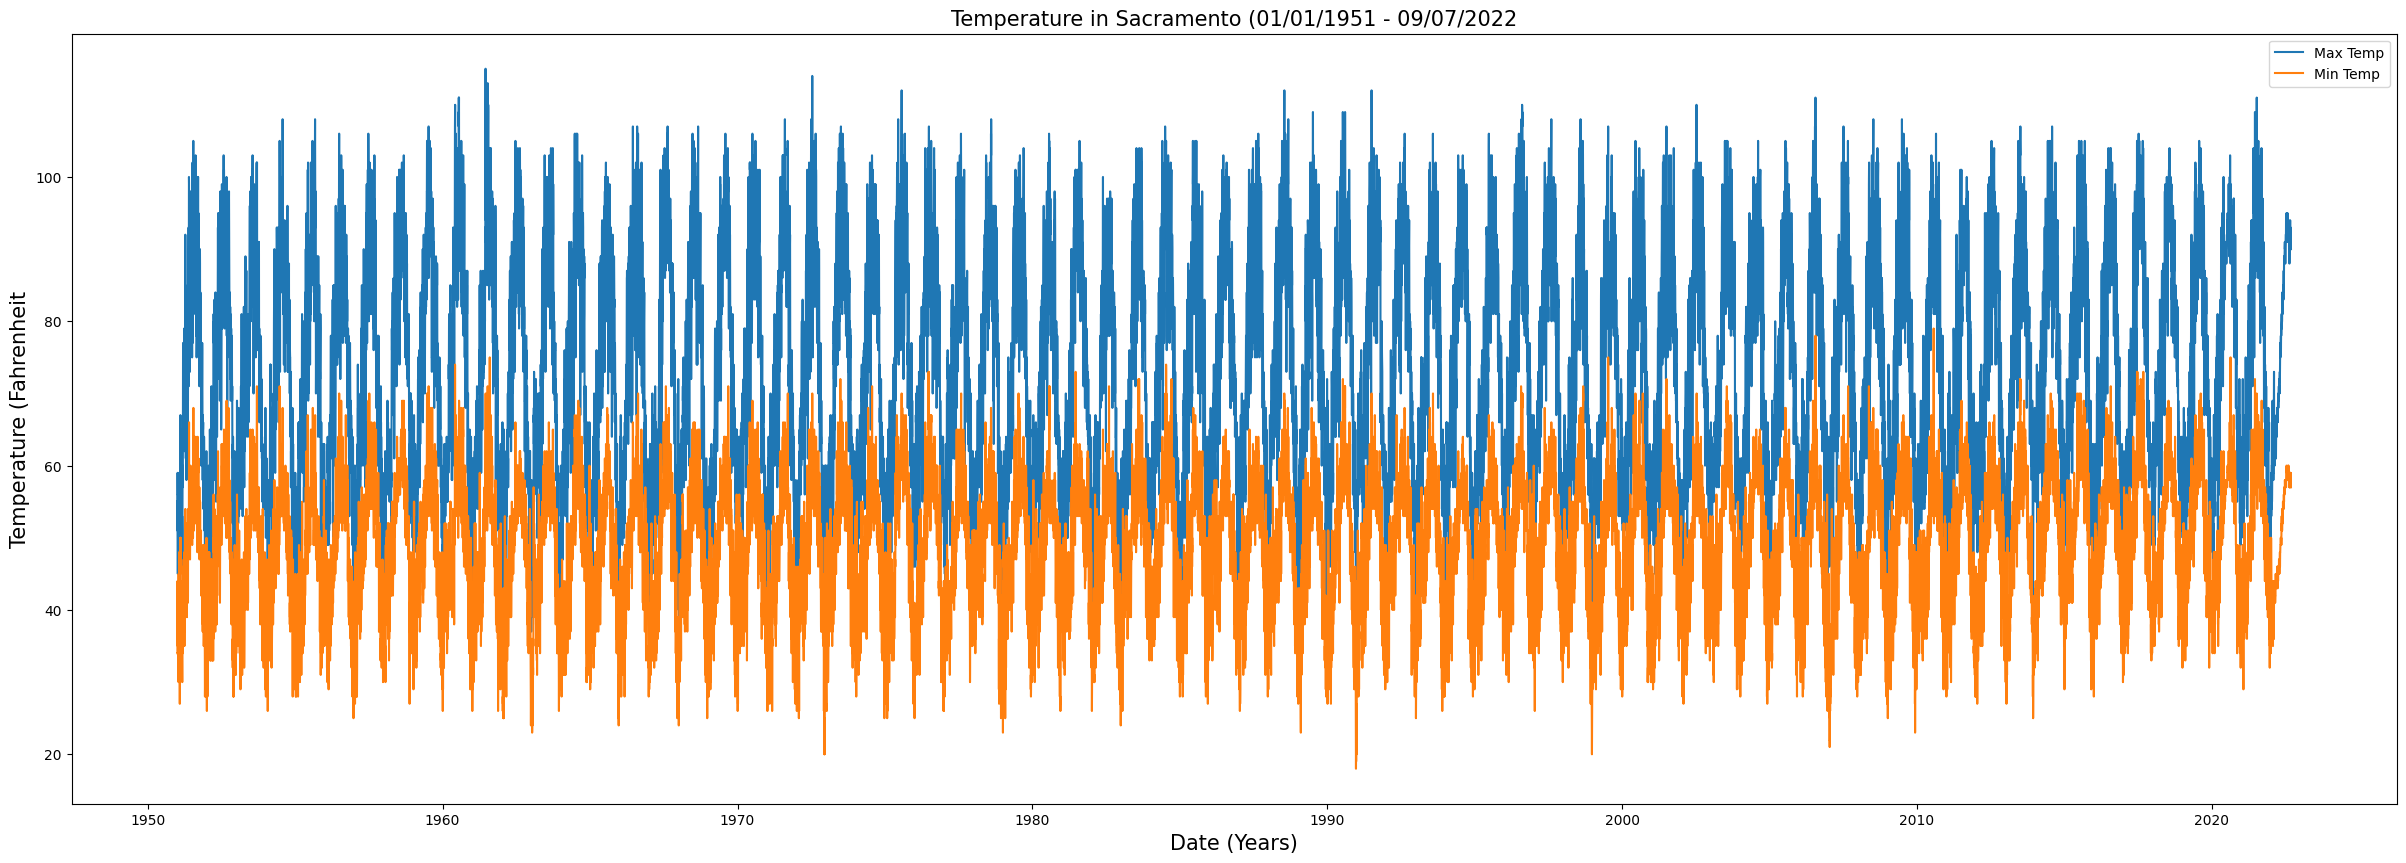

In [15]:
plt.figure(figsize=(30,10))

plt.plot(df1['DateTime'], df1['Max Temp (Fahrenheit)'], label='Max Temp')
plt.plot(df1['DateTime'], df1['Min Temp (Fahrenheit)'], label='Min Temp')

plt.xlabel('Date (Years)', fontsize=15)
plt.ylabel('Temperature (Fahrenheit', fontsize=15)
plt.title('Temperature in Sacramento (01/01/1951 - 09/07/2022', fontsize=15)

plt.legend()
plt.show()

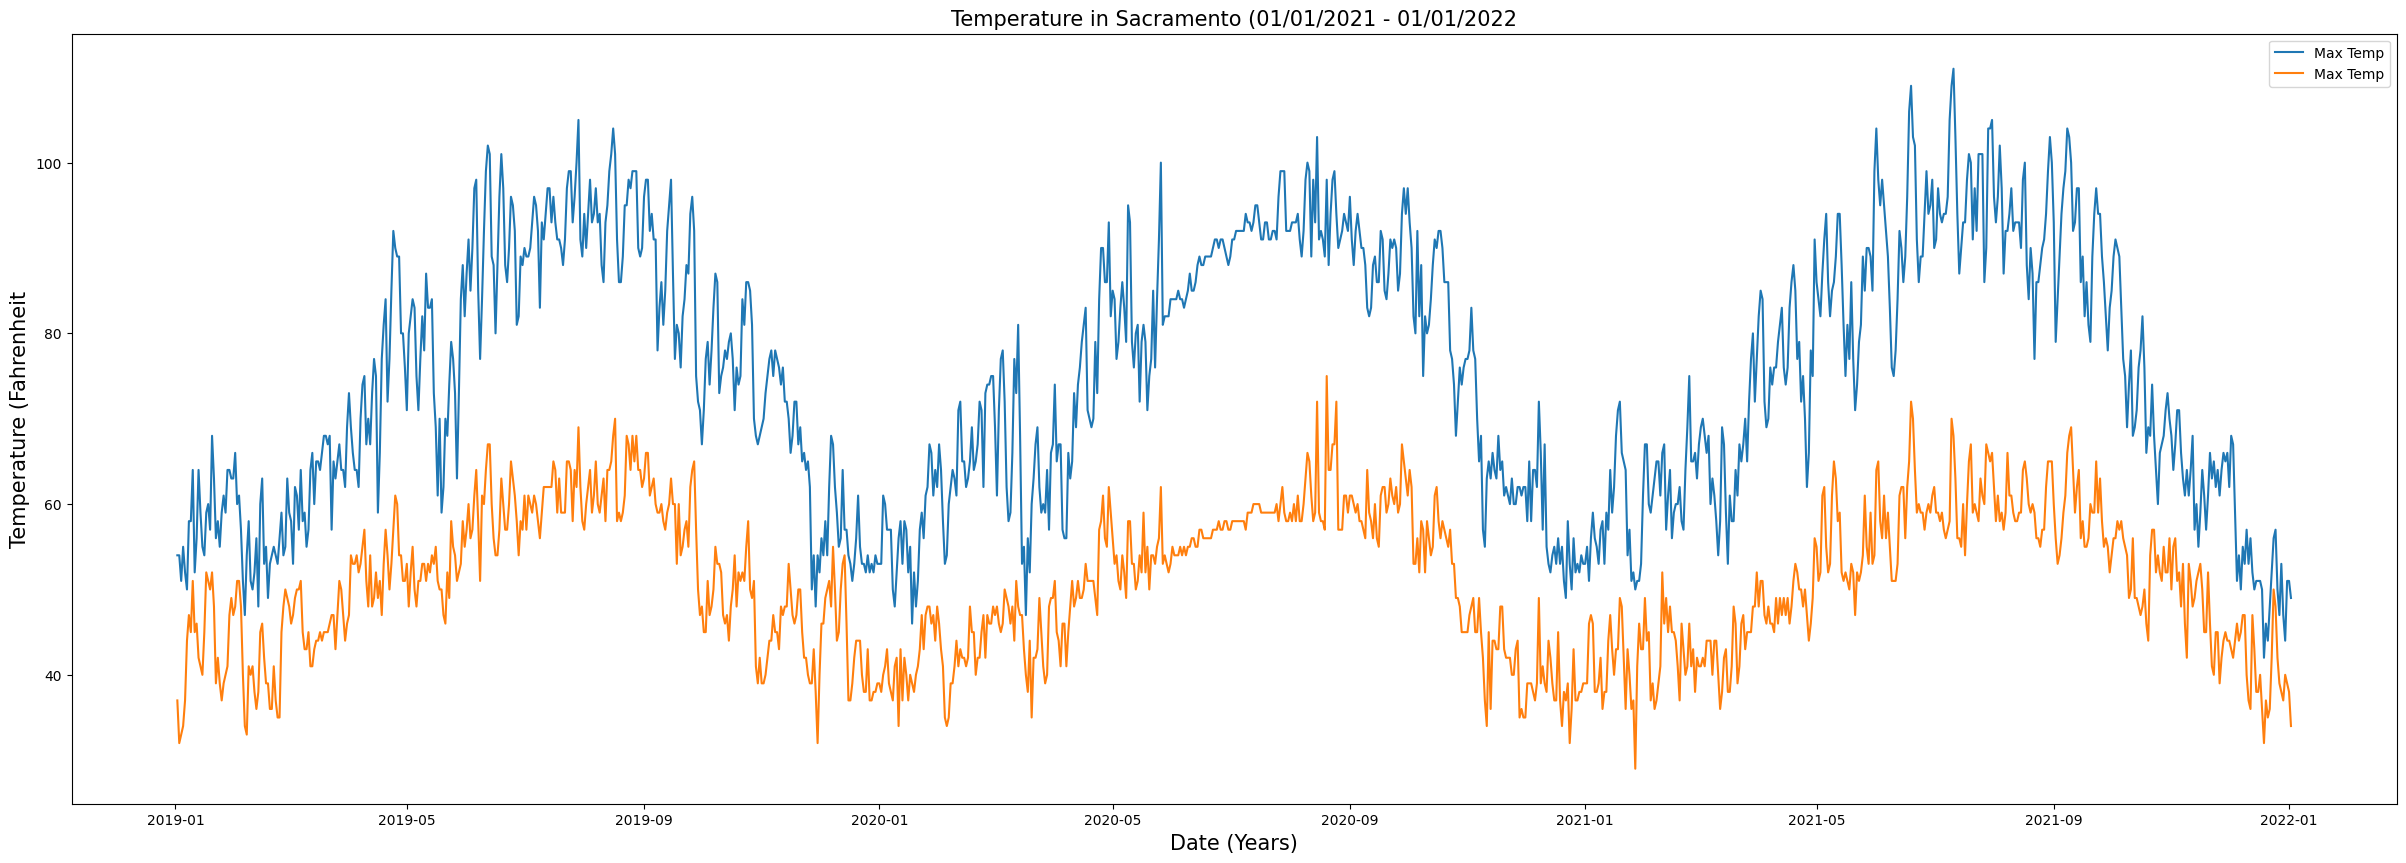

In [16]:
df_2019 = df1.loc['2019-01-01 23:59:59': '2022-01-01 23:59:59']

plt.figure(figsize=(30,10))
plt.plot(df_2019.index, df_2019['Max Temp (Fahrenheit)'], label='Max Temp')
plt.plot(df_2019.index, df_2019['Min Temp (Fahrenheit)'], label='Max Temp')

plt.xlabel('Date (Years)', fontsize=15)
plt.ylabel('Temperature (Fahrenheit', fontsize=15)
plt.title('Temperature in Sacramento (01/01/2021 - 01/01/2022', fontsize=15)

plt.legend()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adfuller_test(series):
    res = adfuller(series)
    print('ADF Statistic : %.15f' % res[0])
    print('p-val : %.15f' % res[1])

In [19]:
adfuller_test(df_2019['Max Temp (Fahrenheit)'])
adfuller_test(df_2019['Min Temp (Fahrenheit)'])

ADF Statistic : -1.675347611479476
p-val : 0.443856784446507
ADF Statistic : -2.372739719225978
p-val : 0.149578683544597


In [20]:
adfuller_test(df1['Min Temp (Fahrenheit)'])
adfuller_test(df1['Max Temp (Fahrenheit)'])

ADF Statistic : -12.835660195681891
p-val : 0.000000000000000
ADF Statistic : -13.844031183526132
p-val : 0.000000000000000


In [21]:
df_tester = df1.copy()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

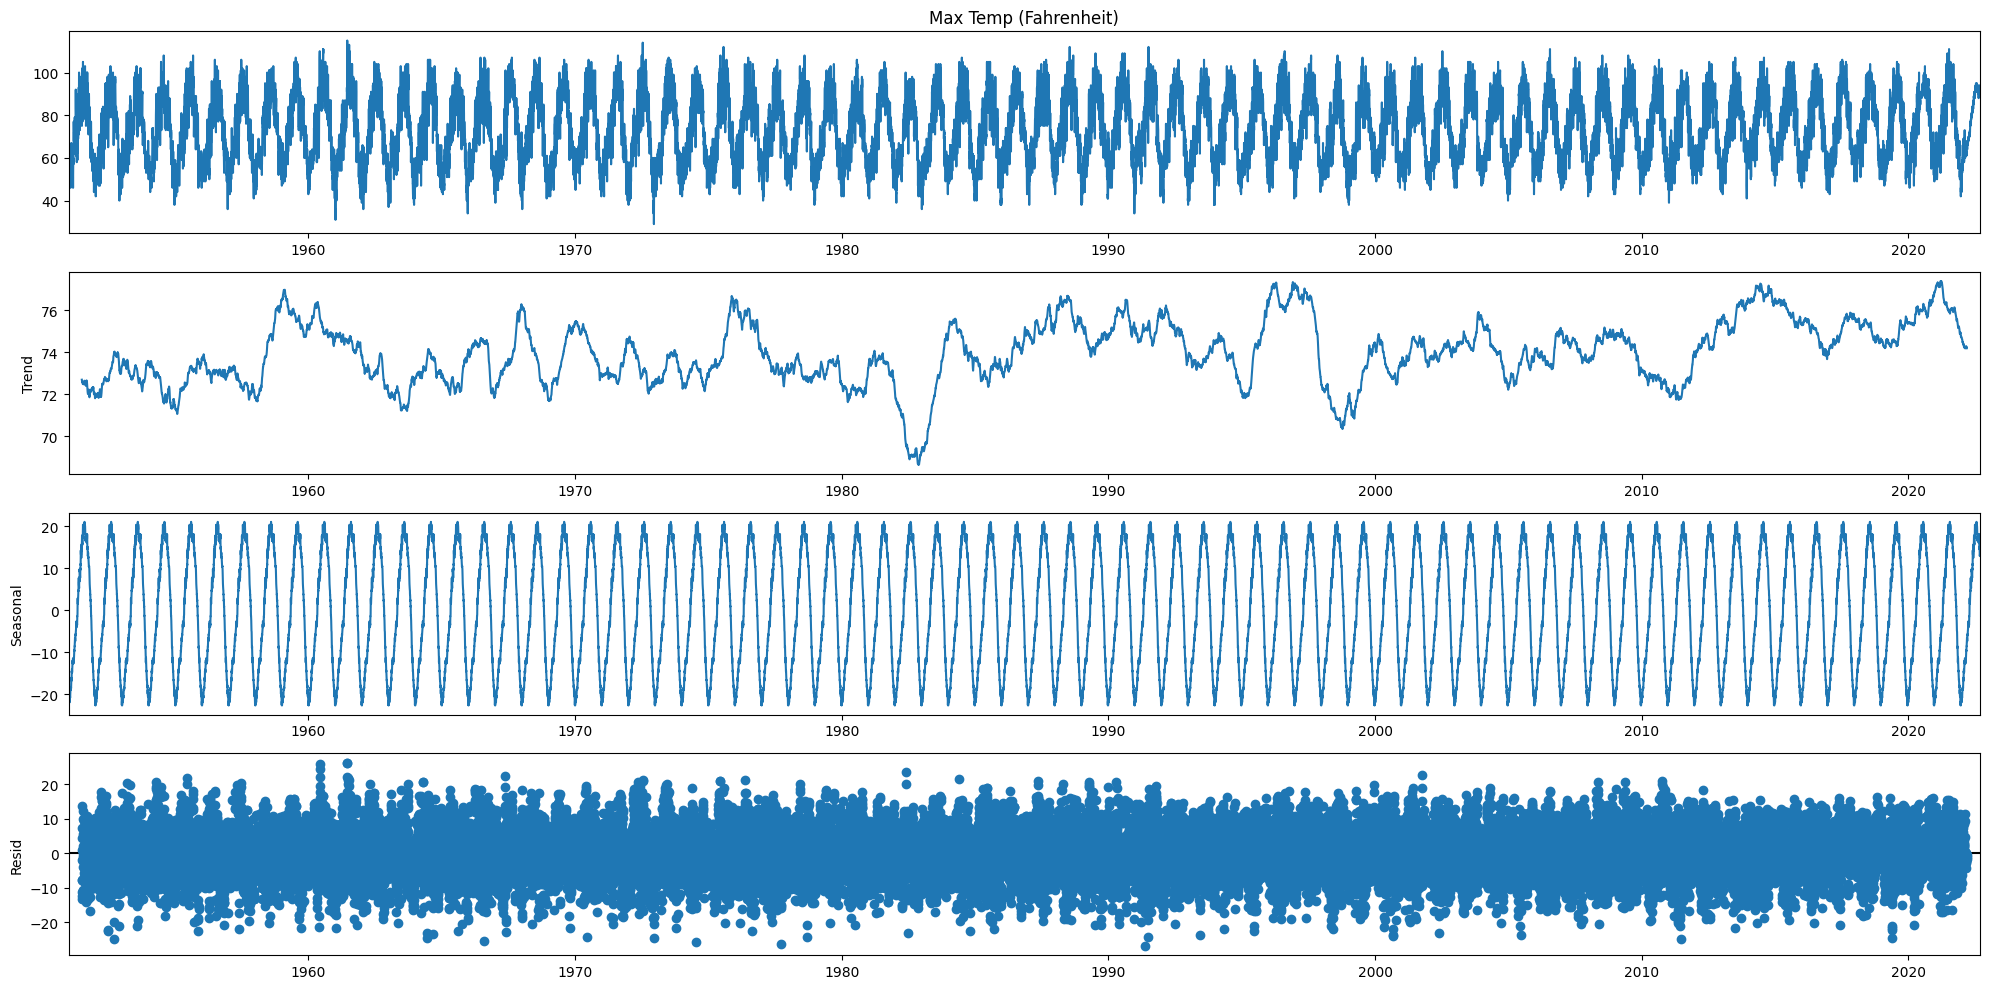

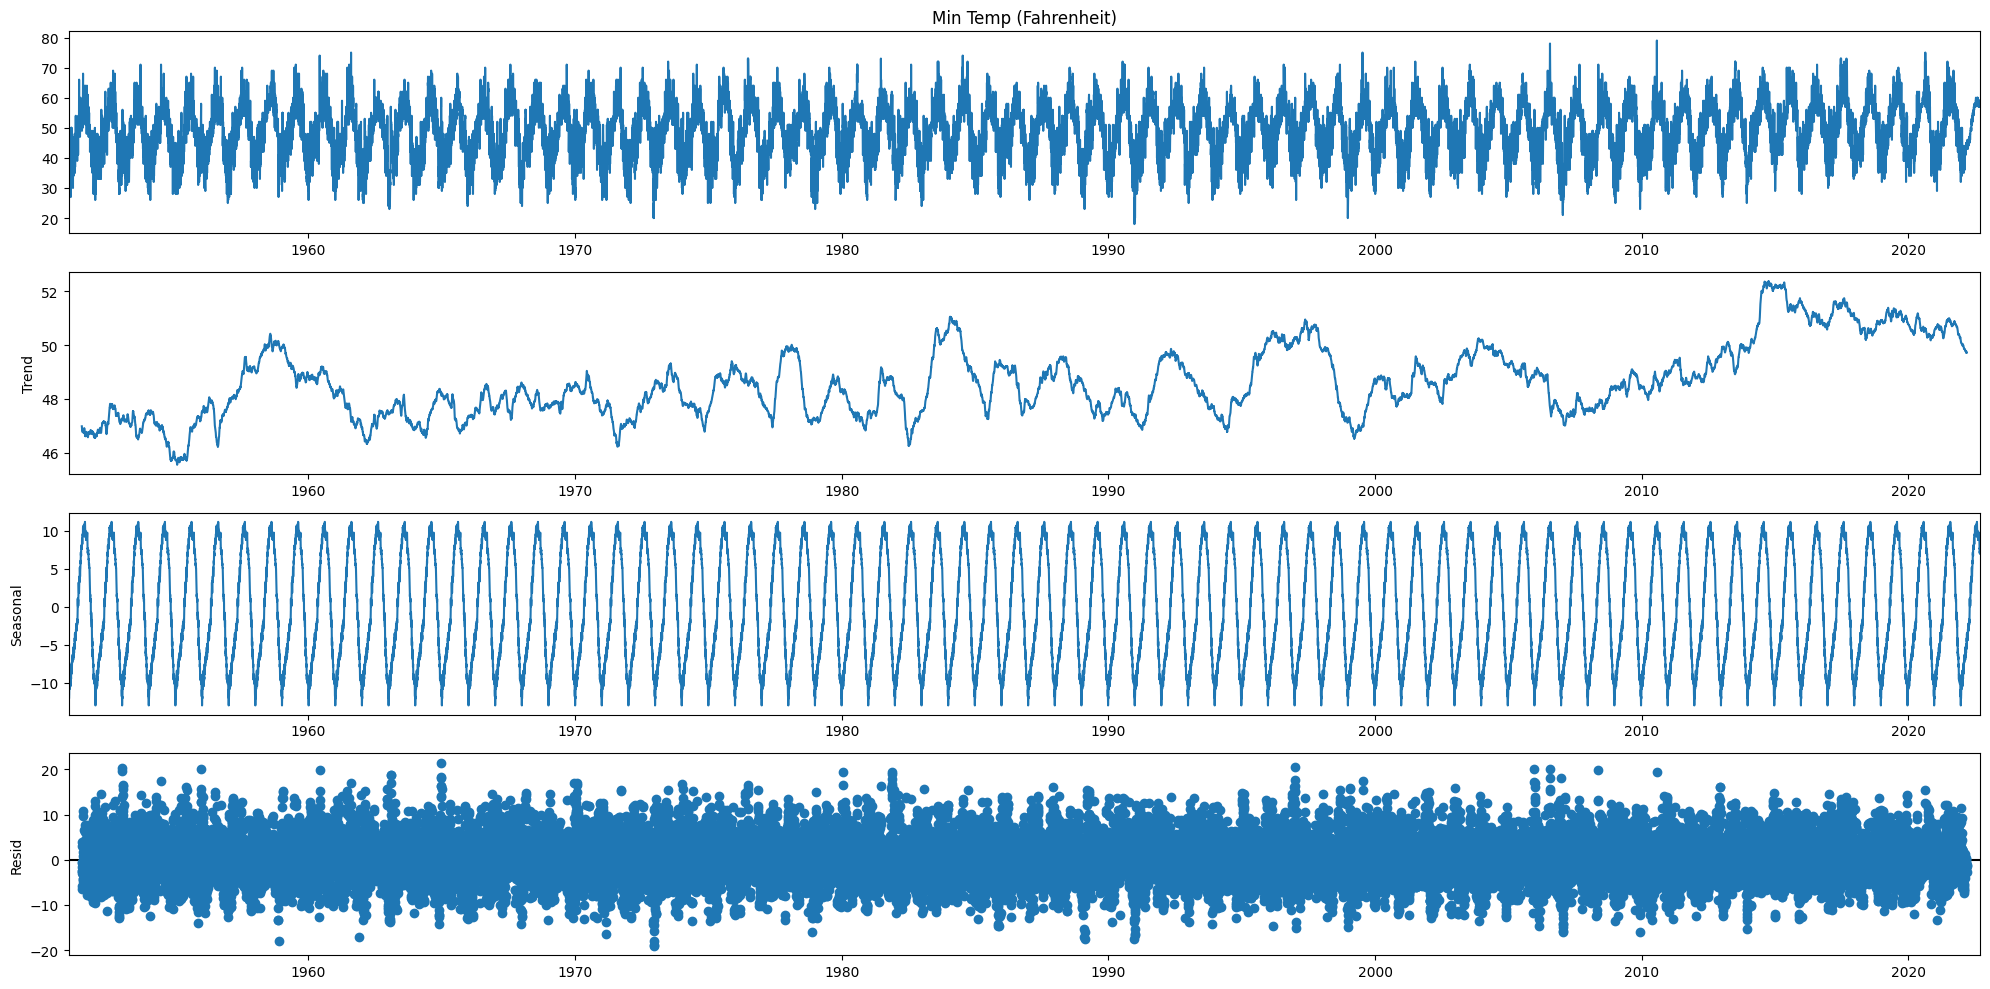

In [23]:
decompose_max = seasonal_decompose(df1['Max Temp (Fahrenheit)'], model='additive', period=365)
decompose_min = seasonal_decompose(df1['Min Temp (Fahrenheit)'], model='additive', period=365)

fig1 = decompose_max.plot()
fig2 = decompose_min.plot()

fig1.set_size_inches((20,10))
fig2.set_size_inches((20,10))

fig1.tight_layout()
fig2.tight_layout()

plt.show()

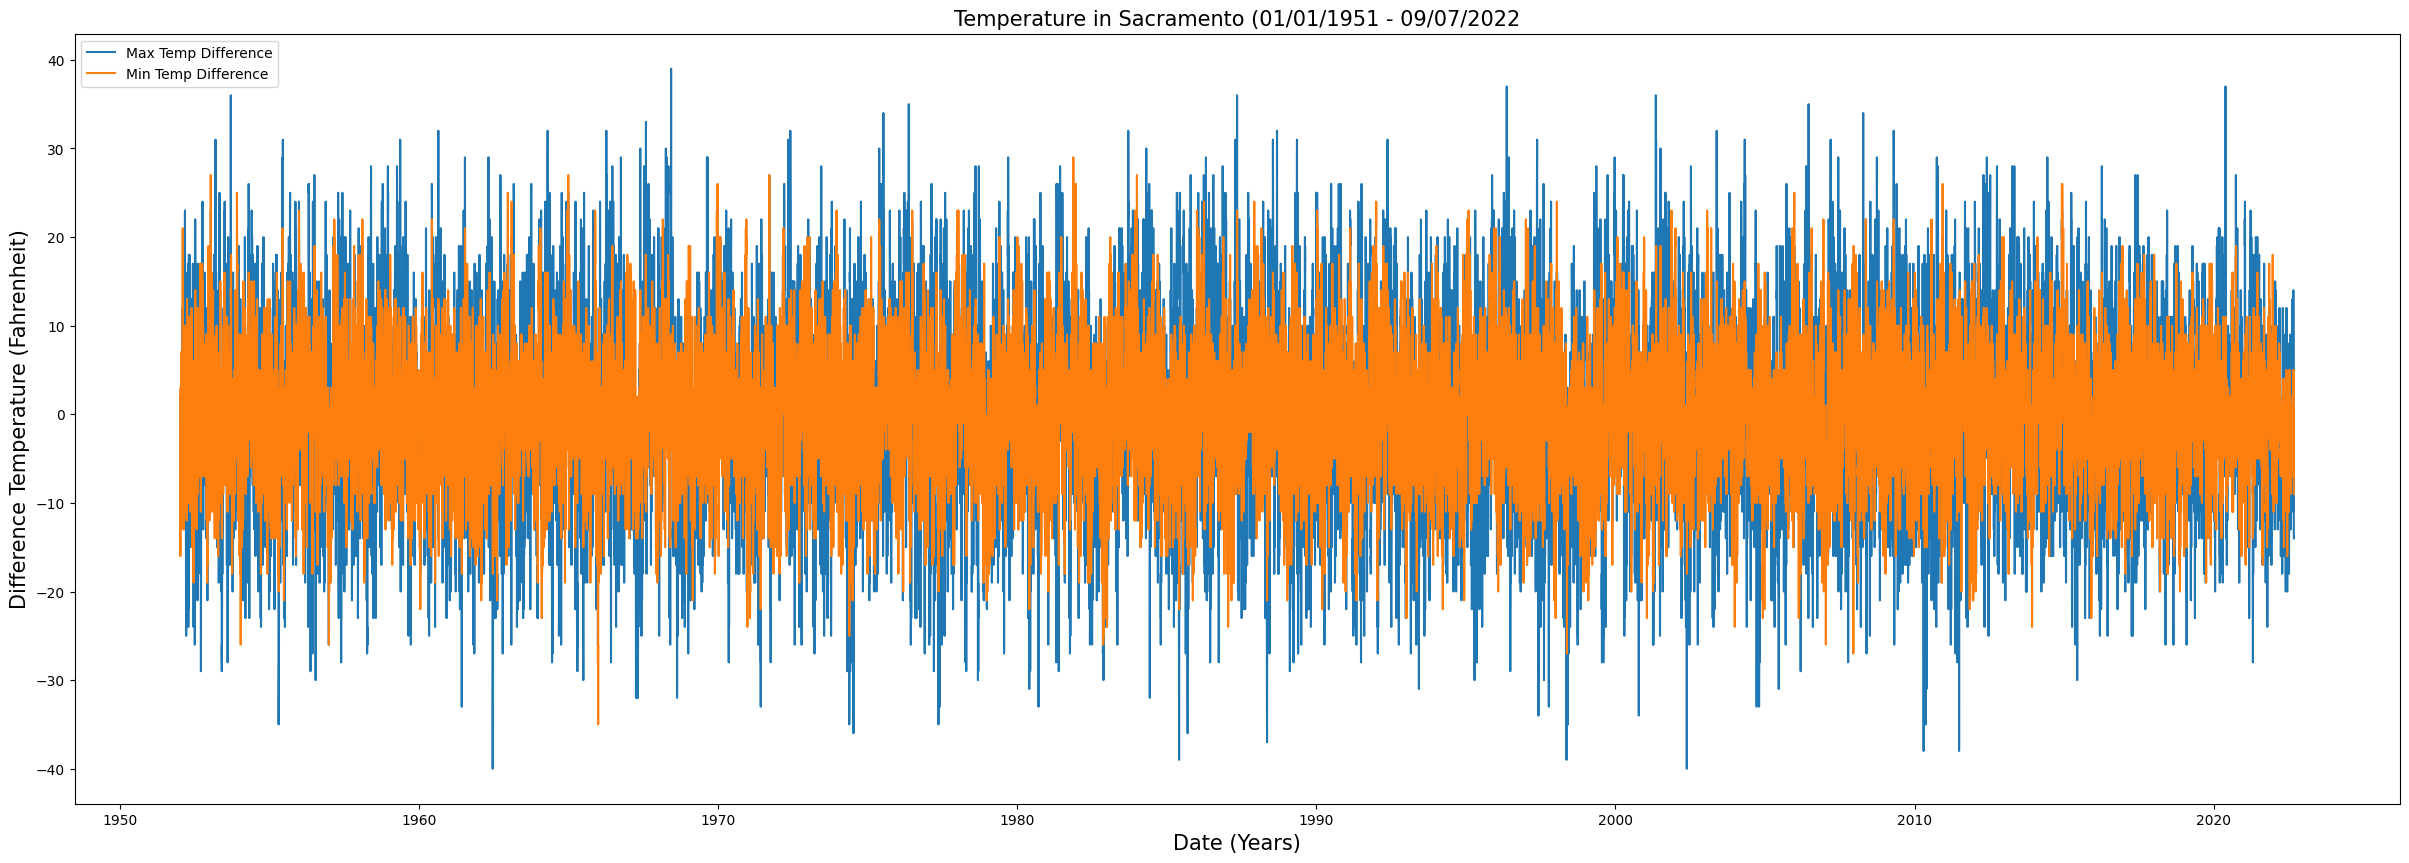

In [24]:
#removing seasonality through differencing

df1['Max Temp Difference'] = df1['Max Temp (Fahrenheit)'] - df1['Max Temp (Fahrenheit)'].shift(365)
df1['Min Temp Difference'] = df1['Min Temp (Fahrenheit)'] - df1['Min Temp (Fahrenheit)'].shift(365)

df1 = df1.dropna()

plt.figure(figsize=(30,10))
plt.plot(df1['DateTime'], df1['Max Temp Difference'], label='Max Temp Difference')
plt.plot(df1['DateTime'], df1['Min Temp Difference'], label='Min Temp Difference')

plt.xlabel('Date (Years)', fontsize=15)
plt.ylabel('Difference Temperature (Fahrenheit)', fontsize=15)
plt.title('Temperature in Sacramento (01/01/1951 - 09/07/2022', fontsize=15)

plt.legend()
plt.show()

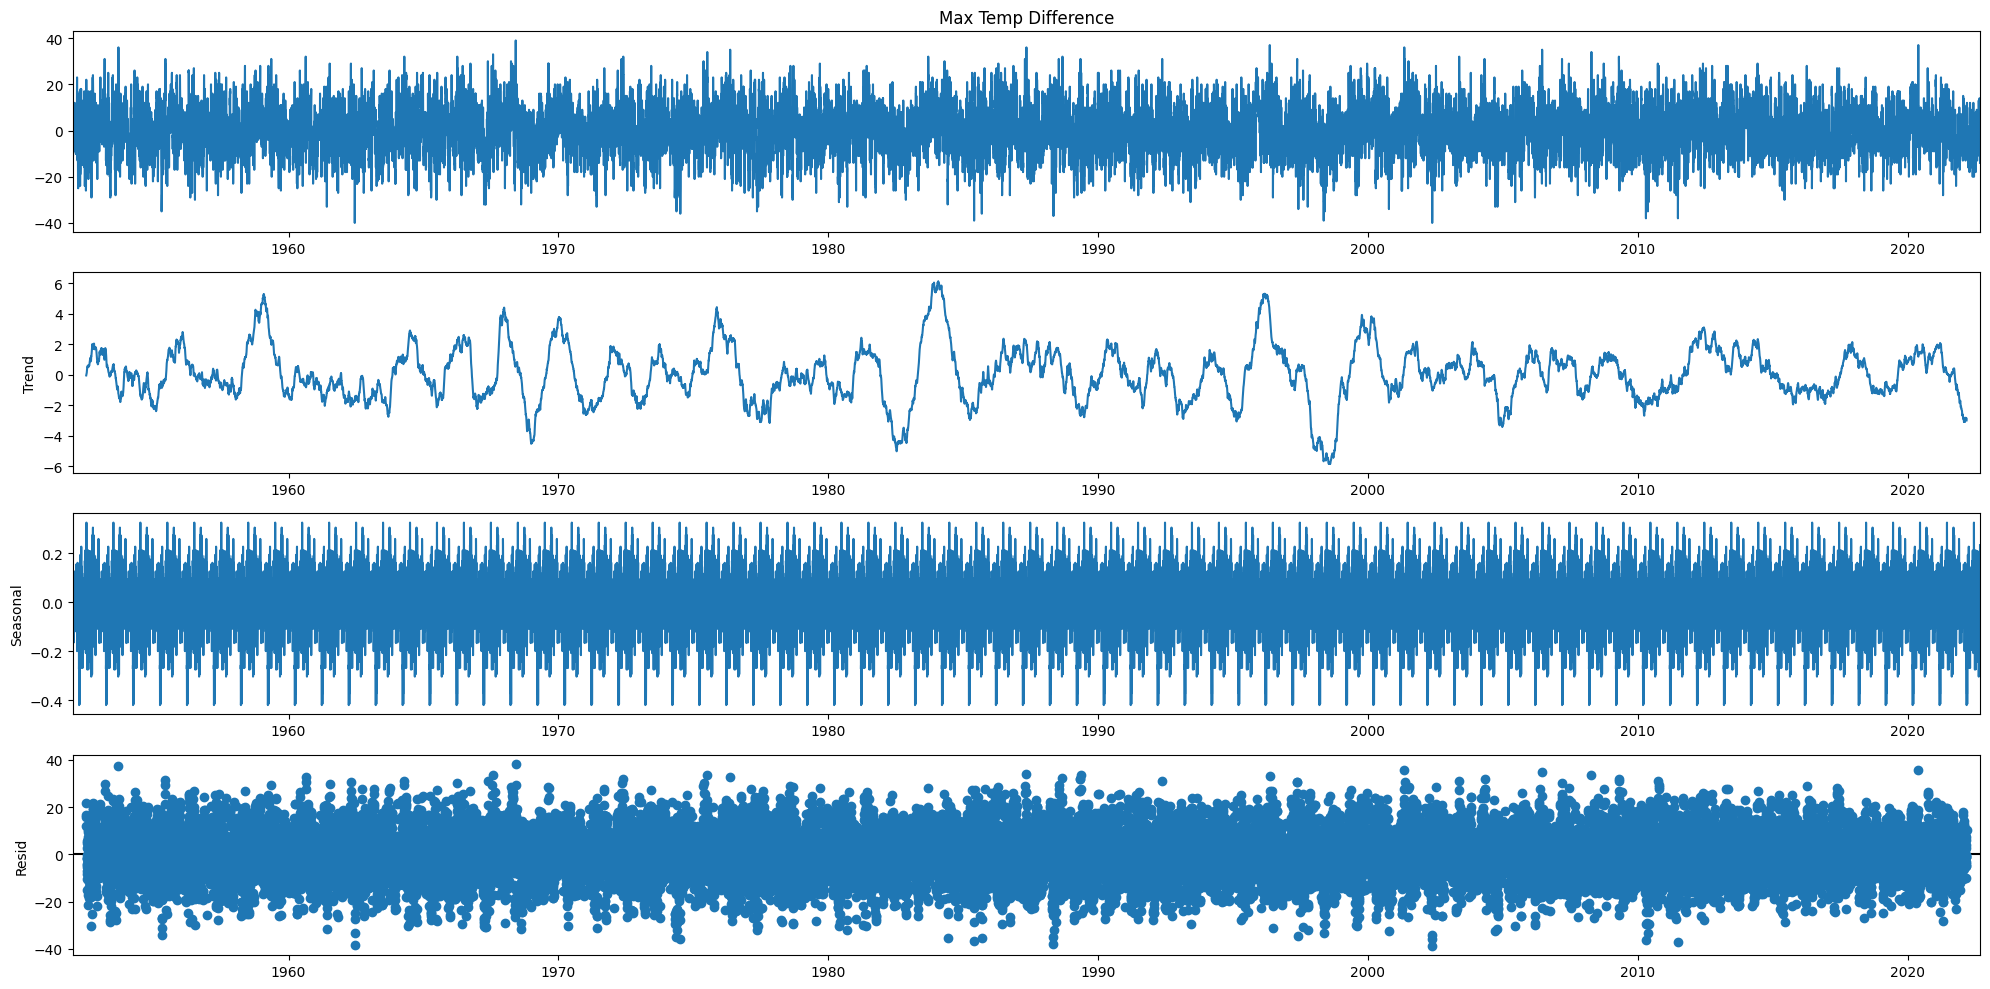

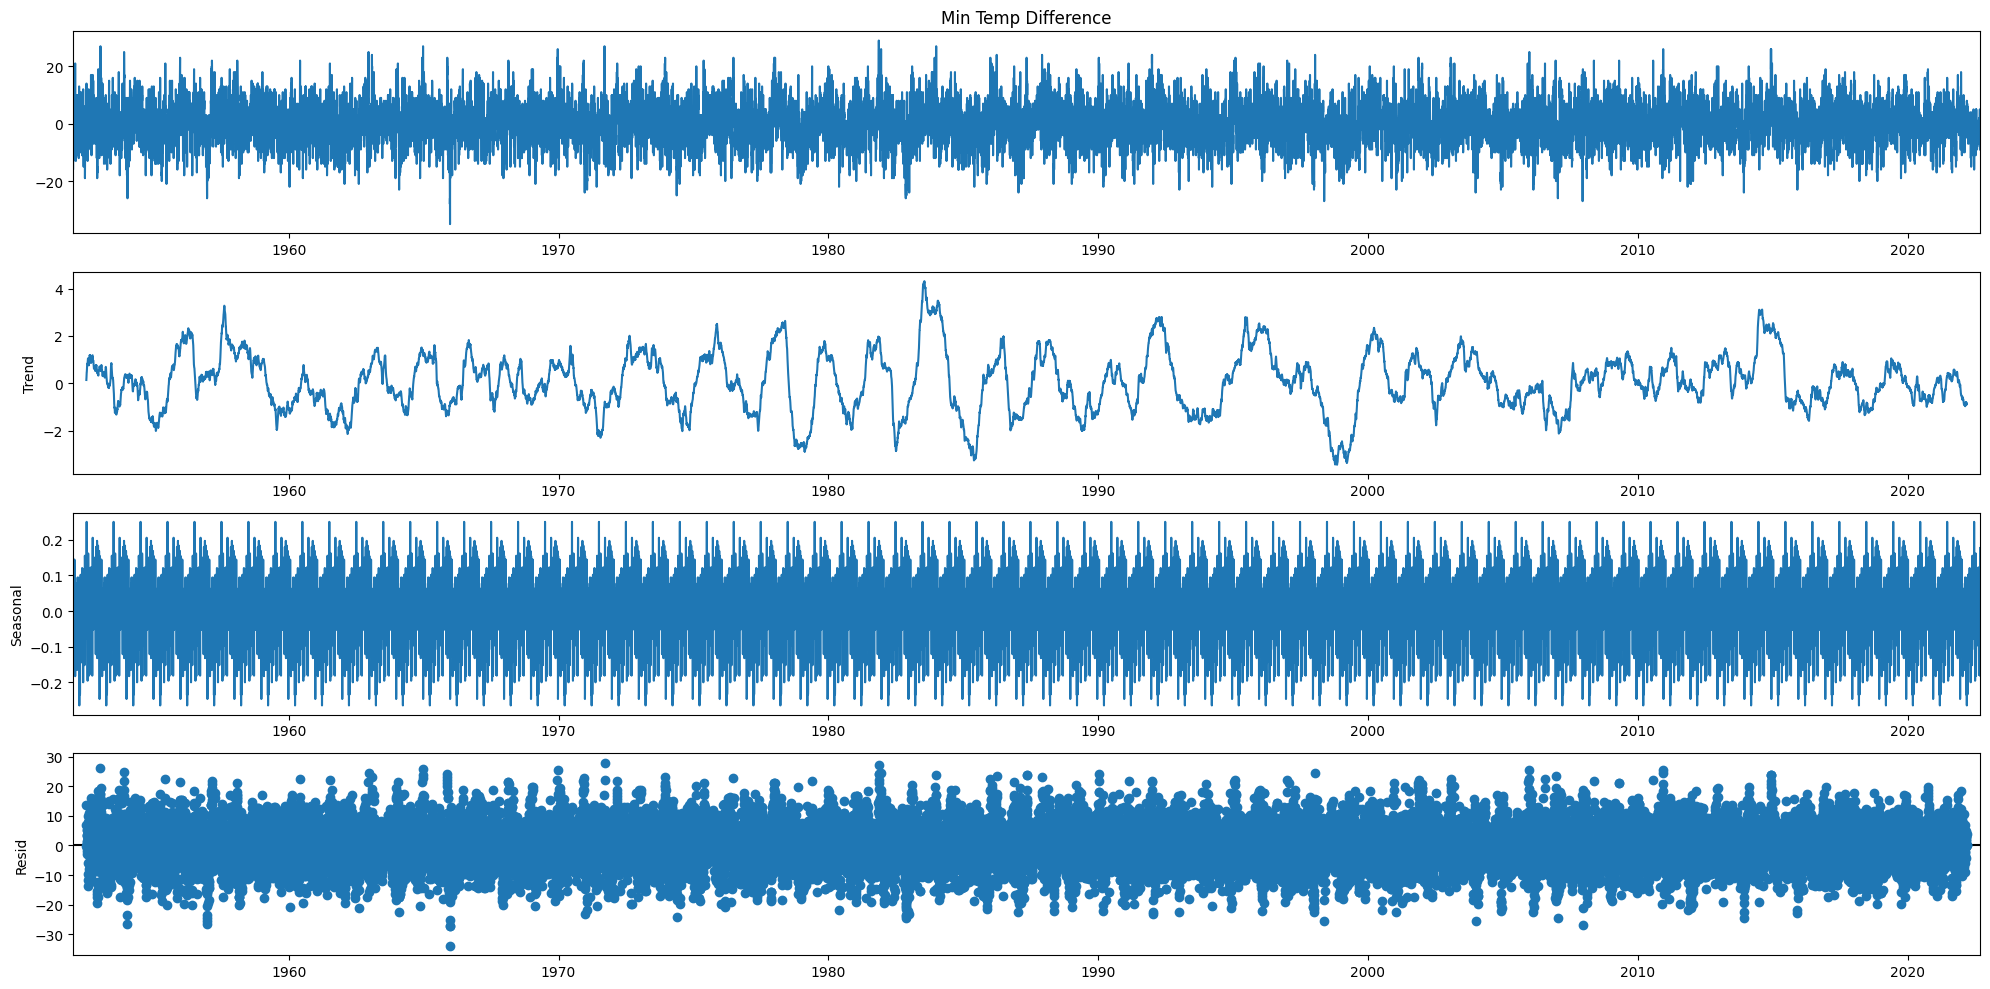

In [25]:
decompose_max = seasonal_decompose(df1['Max Temp Difference'], model='additive', period=365)
decompose_min = seasonal_decompose(df1['Min Temp Difference'], model='additive', period=365)

fig1 = decompose_max.plot()
fig2 = decompose_min.plot()

fig1.set_size_inches((20,10))
fig2.set_size_inches((20,10))

fig1.tight_layout()
fig2.tight_layout()

plt.show()


In [26]:
#Seasonality removed and data is stationary, ready for model implementation

In [27]:
import statsmodels.api as sm

In [28]:
df_tester1 = df1.copy()

In [29]:
df_train_tester = df_tester1[df_tester1.index < '2000-01-01 23:59:59']
df_tester_tester = df_tester1[df_tester1.index >= '2000-01-01 23:59:59']

In [30]:
df_train_tester.tail()

,Station,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit),DateTime,Max Temp Difference,Min Temp Difference
DateTime,,,,,,,
1999-12-27 23:59:59,SACRMNTO.C,0.0,65.0,31.0,1999-12-27 23:59:59,12.0,2.0
1999-12-28 23:59:59,SACRMNTO.C,0.0,65.0,31.0,1999-12-28 23:59:59,10.0,-1.0
1999-12-29 23:59:59,SACRMNTO.C,0.0,61.0,31.0,1999-12-29 23:59:59,5.0,2.0
1999-12-30 23:59:59,SACRMNTO.C,0.0,60.0,30.0,1999-12-30 23:59:59,8.0,-2.0
1999-12-31 23:59:59,SACRMNTO.C,0.0,57.0,34.0,1999-12-31 23:59:59,6.0,-7.0


In [31]:
df_tester_tester.head()

,Station,Precipitation,Max Temp (Fahrenheit),Min Temp (Fahrenheit),DateTime,Max Temp Difference,Min Temp Difference
DateTime,,,,,,,
2000-01-01 23:59:59,SACRMNTO.C,0.00,53.0,35.0,2000-01-01 23:59:59,-3.0,4.0
2000-01-02 23:59:59,SACRMNTO.C,0.00,55.0,28.0,2000-01-02 23:59:59,4.0,-2.0
2000-01-03 23:59:59,SACRMNTO.C,0.00,55.0,34.0,2000-01-03 23:59:59,13.0,-1.0
2000-01-04 23:59:59,SACRMNTO.C,0.01,56.0,39.0,2000-01-04 23:59:59,11.0,4.0
2000-01-05 23:59:59,SACRMNTO.C,0.00,61.0,36.0,2000-01-05 23:59:59,22.0,3.0


In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
#First we will predict the high 

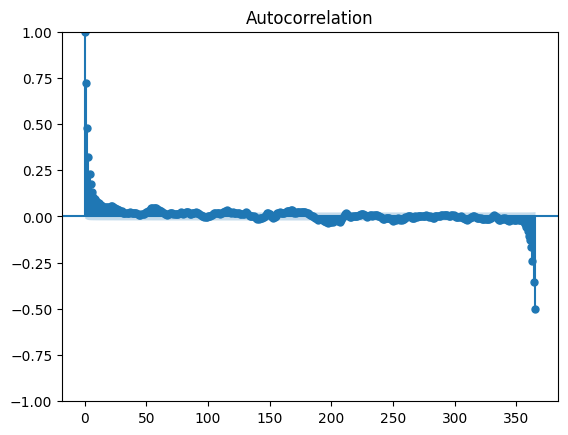

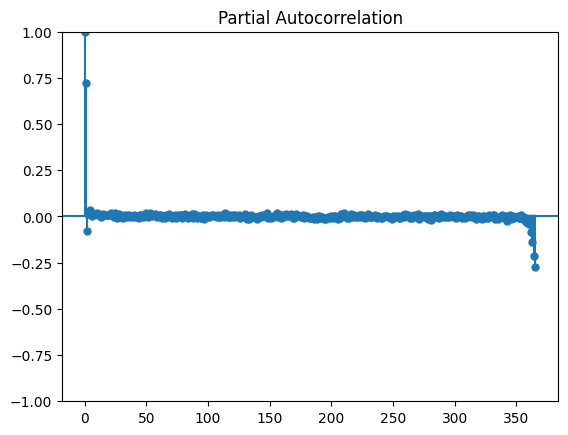

In [34]:
acf_max = plot_acf(df1['Max Temp Difference'], lags=365)
pacf_max = plot_pacf(df1['Max Temp Difference'], lags=365)

In [35]:
#based off acf and pacf only one order of differencing was required
#visually looking at the acf and pacf plots, we can determine which lags are statistically significant

In [36]:
def model_tester(p,a):
        model = sm.tsa.statespace.SARIMAX(endog=df_train_tester['Max Temp (Fahrenheit)'],order=(p,1,a),seasonal_order=(p,1,a,365))
        res = model.fit()
        print(f'i: {p}, j: {a}, AIC:{res.aic}')

In [37]:
df_train_tester = df_train_tester.astype({'Max Temp (Fahrenheit)':'int', 'Max Temp Difference':'int'})

In [38]:
display(df_train_tester.dtypes)

Station                          object
Precipitation                   float64
Max Temp (Fahrenheit)             int32
Min Temp (Fahrenheit)           float64
DateTime                 datetime64[ns]
Max Temp Difference               int32
Min Temp Difference             float64
dtype: object

In [39]:
max_acf_vals = [0,1,2]
max_pacf_vals = [0,1,2]

for x in max_pacf_vals:
    for y in max_acf_vals:
        model_tester(x,y) 

c:\Users\vpabb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vpabb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 17.6 GiB for an array with shape (367, 367, 17533) and data type float64

In [ ]:
#next we will predict the lows

c:\Users\vpabb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


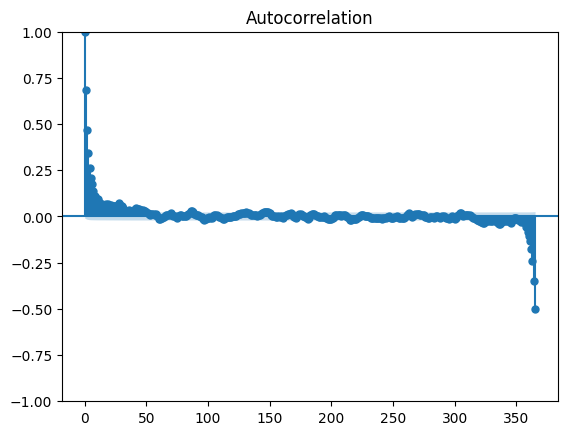

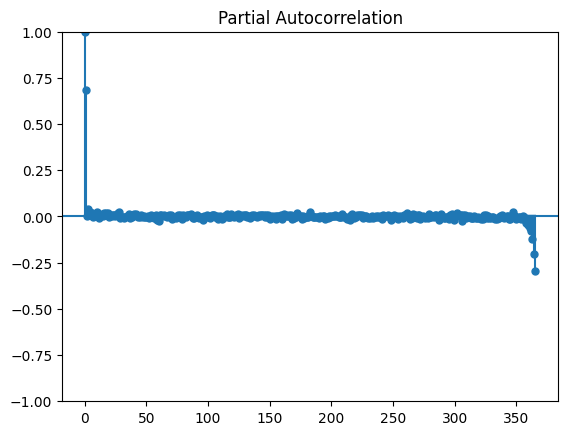

In [ ]:
acf_min = plot_acf(df1['Min Temp Difference'], lags=365)
pacf_min = plot_pacf(df1['Min Temp Difference'], lags=365)